In [ ]:
!pip install gymnasium
# تنزيل بيئة طائر النطاط
!pip install flappy_bird_gymnasium

In [ ]:
# مكتبة التعلم المعزز
!pip install stable_baselines3

In [ ]:
# استيراد المكتبات اللازمة
import gymnasium as gym
import flappy_bird_gymnasium

In [ ]:
# إنشاء البيئة
env = gym.make("FlappyBird-v0", render_mode="rgb_array", use_lidar=True)
# إعادة التهيئة
obs, _ = env.reset()

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# مسار مجلد العمل
working_folder='/content/drive/MyDrive/RLModels/'
# عدد دورات التدريب
total_timesteps=2000000
# اسم الملف
model_file_name=f'ppo_flappybird_RL_model_{total_timesteps}'
# مسار الملف
model_file_name_path= working_folder + model_file_name

In [ ]:
# مكتبة التعلم المُعزز
from stable_baselines3 import PPO

In [ ]:
# تنزيل النموذج المدرب
model=PPO.load(model_file_name_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [ ]:
# قائمة لتخزين المكافآت قبل التعلم
reward_history_before = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# قائمة لتخزين المكافآت بعد التدريب
reward_history_after = []

In [ ]:
# عدد الحلقات
n_eval_episodes = 32

In [ ]:
# حلقات مع أفعال عشوائية
for episode in range(n_eval_episodes):
    obs, info = env.reset()
    done = False
    episode_reward = 0
    while not done:
        # فعل عشوائي
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        if terminated or truncated:
          done=True
    # إضافة إجمالي المكافآت لقائمة المكافآت
    reward_history_before.append(episode_reward)

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [ ]:
# حلقات مع أفعال من النموذج المدرب
for ep in range(n_eval_episodes):
    obs, info = env.reset()
    done = False
    episode_reward = 0
    while not done:
        # الحصول على الفعل من النموذج المدرب
        action, _states = model.predict(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        if terminated or truncated:
          done=True
    # إضافة إجمالي المكافآت لقائمة المكافآت
    reward_history_after.append(episode_reward)

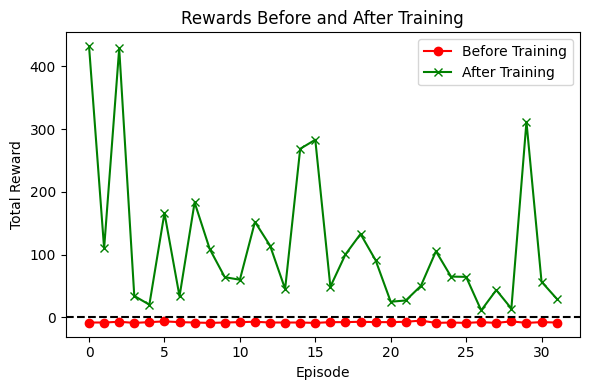

In [ ]:
import matplotlib.pyplot as plt
# رسم المكافآت قبل وبعد التدريب
plt.figure(figsize=(6, 4))
# مكافآت الأفعال العشوائية
plt.plot(reward_history_before, label='Before Training', color='red', linestyle='-', marker='o')
# مكافآت أفعال النموذج المدرب
plt.plot(reward_history_after, label='After Training', color='green', linestyle='-', marker='x')

# تخصيص النموذج
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Rewards Before and After Training")
# رسم المحور الأفقي
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

# العرض
plt.tight_layout()
plt.show()

In [ ]:
# مكتبة لإنشاء فلم
from moviepy.editor import ImageSequenceClip

  from scipy.ndimage.filters import sobel



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

  and should_run_async(code)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# مسار مجلد الأفلام
clips_folder='/content/drive/MyDrive/FlappyBirdVideos/'

In [ ]:
n_eval_episodes=10
for episode in range(n_eval_episodes):
    # قائمة لحفظ الصور المتتالية
    frames = []
    # مؤشر الانتهاء
    done = False
    # إجمالي مكافآت الحلقة الواحدة
    total_reward = 0
    # إعادة التهيئة
    obs, info = env.reset()
    # إضافة صورة البيئة
    frames.append(env.render())
    while not done:
        # فعل من النموذج
        action, info = model.predict(obs)
        # تنفيذ الفعل
        obs, reward, terminated, truncated, info = env.step(action)
        # إضافة صورة البيئة
        frames.append(env.render())
        # إضافة المكافأة الحالية لإجمالي المكافآت
        total_reward = total_reward + reward
        if terminated or truncated:
          done=True
    # إنشاء فلم من قائمة الصور
    clip = ImageSequenceClip(frames, fps=10)
    # اسم الملف
    clip_file_name=f'trained_flappybird_episodes_{total_timesteps}_{total_reward}.mp4'
    # مسار الملف
    clip_file_name_path= clips_folder+clip_file_name
    # حفظ الملف
    clip.write_videofile(clip_file_name_path)

Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_49.50000000000045.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_49.50000000000045.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_49.50000000000045.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_120.69999999999739.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_120.69999999999739.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_120.69999999999739.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_206.7999999999926.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_206.7999999999926.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_206.7999999999926.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_10.39999999999997.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_10.39999999999997.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_10.39999999999997.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_7.499999999999982.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_7.499999999999982.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_7.499999999999982.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_130.29999999999646.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_130.29999999999646.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_130.29999999999646.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_147.2999999999959.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_147.2999999999959.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_147.2999999999959.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_20.30000000000003.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_20.30000000000003.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_20.30000000000003.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_37.70000000000024.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_37.70000000000024.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_37.70000000000024.mp4
Moviepy - Building video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_267.39999999999304.mp4.
Moviepy - Writing video /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_267.39999999999304.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/FlappyBirdVideos/trained_flappybird_episodes_2000000_267.39999999999304.mp4


In [ ]:
# إغلاق البيئة
env.close()